# Chapter 1: Statistical Thinking for Programmers

Download the files: 2002FemResp.dat.gz and 2002FemPreg.dat.gz.

In [1]:
import matplotlib.pyplot as pyplot
%matplotlib inline

In [2]:
import urllib

urllib.urlretrieve ("http://greenteapress.com/thinkstats/2002FemPreg.dat.gz", "2002FemPreg.dat.gz")
urllib.urlretrieve ("http://greenteapress.com/thinkstats/2002FemResp.dat.gz", "2002FemResp.dat.gz")


('2002FemResp.dat.gz', <httplib.HTTPMessage instance at 0x104094f80>)

In [3]:
execfile("survey.py") # This command will produce an error
# ("TypeError: main() takes at most 2 arguments (3 given)") 
# in the notebook; ignore and move on.

TypeError: main() takes at most 2 arguments (3 given)

No need to unzip these files as the included module survey.py does this for you. Needless to say, you should have this file in your directory to proceed.

Exercise 1.2 Involves reading the documentation for the data you downloaded and doing some preliminary data exploration using the survey module

In [4]:
import survey

data_dir='.'

resp = Respondents()
resp.ReadRecords(data_dir)
print 'Number of respondents', len(resp.records)

preg = Pregnancies()
preg.ReadRecords(data_dir)
print 'Number of pregnancies', len(preg.records)


Number of respondents 7643
Number of pregnancies 13593


Exercise 1.3 
In this exercise you will write a program to explore the data in
the Pregnancies table.
1. In the directory where you put survey.py and the data files, create a
file named first.py and type or paste in the following code:

        import survey
        table = survey.Pregnancies()
        table.ReadRecords()
        print 'Number of pregnancies', len(table.records)


The result should be 13593 pregnancies.


In [5]:
import survey 
table = survey.Pregnancies() 
table.ReadRecords() 
print 'Number of pregnancies', len(table.records)

Number of pregnancies 13593


 #2 Write a loop that iterates table and counts the number of live births.
Find the documentation of outcome and confirm that your result is
consistent with the summary in the documentation.

In [6]:
outcms = 0

for recd in table.records:
    if recd.outcome == 1:
        outcms += 1
       

print "number of live births:", outcms


number of live births: 9148


#3 Modify the loop to partition the live birth records into two groups, one
for first babies and one for the others. Again, read the documentation
of birthord to see if your results are consistent.
When you are working with a new dataset, these kinds of checks
are useful for finding errors and inconsistencies in the data, detecting
bugs in your program, and checking your understanding of the
way the fields are encoded.
#4 Compute the average pregnancy length (in weeks) for first babies and
others. Is there a difference between the groups? How big is it?

In [7]:
# This would be module "first.py"

import survey
table = survey.Pregnancies()
table.ReadRecords()
print 'Number of pregnancies', len(table.records)

outcmsf = 0
outcmso = 0
lenpregf = 0.
lenprego = 0.

for recd in table.records:
    if recd.outcome == 1:
        if recd.birthord == 1:
            outcmsf += 1
            lenpregf += recd.prglength
        else:
            outcmso +=1
            lenprego += recd.prglength

print "Number of livebirths, and mean gestation period (in weeks) for first born babies:", outcmso, lenprego/outcmso
print "Number of livebirths, and mean gestation period (in weeks) for babies not first born:", outcmsf, lenpregf/outcmsf

# Compute difference in mean periods in hours

diff_gest = (lenprego/outcmso - lenpregf/outcmsf)* 7 * 24 * -1

print "The mean gestation period differs by %f hours" % (diff_gest)


Number of pregnancies 13593
Number of livebirths, and mean gestation period (in weeks) for first born babies: 4735 38.5229144667
Number of livebirths, and mean gestation period (in weeks) for babies not first born: 4413 38.6009517335
The mean gestation period differs by 13.110261 hours


# Chapter 2: Descriptive Statistics 

Exercise 2.1 For the exercises in this chapter you should download http:
//thinkstats.com/thinkstats.py, which contains general-purpose functions
we will use throughout the book. You can read documentation of
these functions in http://thinkstats.com/thinkstats.html.
Write a function called Pumpkin that uses functions from thinkstats.py
to compute the mean, variance and standard deviation of the pumpkins
weights in the previous section.

In [8]:
"""Write a function called Pumpkin that uses functions from thinkstats.py
to compute the mean, variance and standard deviation of the pumpkins
weights in the previous section."""

import thinkstats
import math

list_string = raw_input("Pumpkin Sizes? Use' a, b, c,....' format.")
lst = [int(i) for i in list_string.split(',')]
print "This is your list of pumpkin sizes", lst

print "The mean of the pumpkins:", thinkstats.Mean(lst)

print "The variance of the pumpkins:", thinkstats.Var(lst)

print "The standard deviation of the pumpkins:", math.sqrt(thinkstats.Var(lst))


Pumpkin Sizes? Use' a, b, c,....' format.


ValueError: invalid literal for int() with base 10: ''

Exercise 2.2 Reusing code from survey.py and first.py, compute the standard
deviation of gestation time for first babies and others. Does it look like
the spread is the same for the two groups?
How big is the difference in the means compared to these standard deviations?
What does this comparison suggest about the statistical significance
of the difference?

In [9]:
# using the variables from the "first.py" script, above. There is no first.py script to import, just make sure the 'first.py' 
# cell above is activated.

first_born_gest = []
other_born_gest = []


for recd in table.records:
    if recd.outcome == 1:
        if recd.birthord == 1:
            outcmsf += 1
            lenpregf += recd.prglength
            first_born_gest.append(recd.prglength)
        else:
            outcmso +=1
            lenprego += recd.prglength
            other_born_gest.append(recd.prglength)


print "The standard deviation of the first born, and other born gestation periods, respectively are:", \
math.sqrt(thinkstats.Var(first_born_gest)), math.sqrt(thinkstats.Var(other_born_gest))
print "The difference in standard deviations is:", math.sqrt(thinkstats.Var(first_born_gest)) - math.sqrt(thinkstats.Var(other_born_gest))

The standard deviation of the first born, and other born gestation periods, respectively are: 2.79158506982 2.61557611068
The difference in standard deviations is: 0.17600895914


Exercise 2.3 The mode of a distribution is the most frequent value (see http:
//wikipedia.org/wiki/Mode_(statistics)). Write a function called Mode
that takes a Hist object and returns the most frequent value.
As a more challenging version, write a function called AllModes that takes
a Hist object and returns a list of value-frequency pairs in descending order
of frequency. Hint: the operator module provides a function called
itemgetter which you can pass as a key to sorted.

In [10]:
def mode_calc():
    
    import Pmf
    lst_for_stats = raw_input("Please enter numbers, separated by commas:")
    lst_b = [int(i) for i in lst_for_stats.split(',')]
    print "This is your list:", lst_b
    hist_a = Pmf.MakeHistFromList(lst_b)
    hist_a_dict = hist_a.GetDict()
    sorted_lst_k = sorted(hist_a_dict, key = lambda x: hist_a_dict[x], reverse = True)
    mode_list = [sorted_lst_k[0]]
    for i in range(len(sorted_lst_k)):

        if hist_a_dict[sorted_lst_k[i]] != hist_a_dict[sorted_lst_k[i+1]]:
            if len(mode_list) == 1:
                print "The mode is:", mode_list
                return
            else:
                print "The modes are:", mode_list
                return
        else:
            mode_list.append(sorted_lst_k[i+1])

In [11]:
import Pmf
def all_modes():
    
    lst_for_stats = raw_input("Please enter numbers, separated by commas:")
    lst_b = [int(i) for i in lst_for_stats.split(',')]
    print "This is your list:", lst_b
    hist_a = Pmf.MakeHistFromList(lst_b)
    hist_a_dict = hist_a.GetDict()
    sorted_lst_k = sorted(hist_a_dict, key = lambda x: hist_a_dict[x], reverse = True)
    all_mode_list = []
    for i in sorted_lst_k:
        
        all_mode_list.append((i, hist_a_dict[i]) )
    print all_mode_list

In [12]:
all_modes()

Please enter numbers, separated by commas:5,5,7,7
This is your list: [5, 5, 7, 7]
[(5, 2), (7, 2)]


In [13]:
hist_a = Pmf.MakeHistFromList([1,2,3,4,4,4,4,5,6,7,8,9])

In [14]:
for val in sorted(hist_a.Values()):
    print val, hist_a.Freq(val)

1 1
2 1
3 1
4 4
5 1
6 1
7 1
8 1
9 1


In [15]:
val, freq = hist_a.Render()

<Container object of 9 artists>

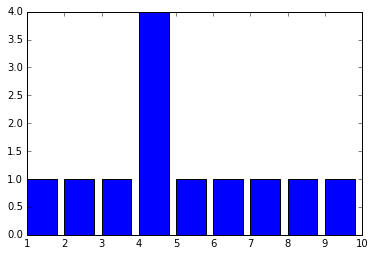

In [16]:
pyplot.bar(val, freq)

Exercise 2.4 According toWikipedia, “Survival analysis is a branch of statistics
which deals with death in biological organisms and failure in mechanical
systems;” see http://wikipedia.org/wiki/Survival_analysis.
As part of survival analysis, it is often useful to compute the remaining lifetime
of, for example, a mechanical component. If we know the distribution
of lifetimes and the age of the component, we can compute the distribution
of remaining lifetimes.
Write a function called RemainingLifetime that takes a Pmf of lifetimes and
an age, and returns a new Pmf that represents the distribution of remaining
lifetimes.

In [17]:
import Pmf
def RemaningLifetime():
    cutoff = 0
    raw_lst = raw_input("Give me a list of lifetimes: ")
    age = int(raw_input("Give me an age: "))
    
    lst = [int(i) for i in raw_lst.split(',')]
    
    
    agepmf = Pmf.MakePmfFromList(lst)
    print agepmf.Values(), agepmf.Total()
    for val in sorted(agepmf.Values()):
        if age <= val:
            cutoff = val
            break
        else:
            agepmf.Remove(val)

    agepmf.Normalize()
    
    print "The cutoff is: ", cutoff,". "
    print "The new distribution of ages is: ", agepmf.Values()
    vals, freq = agepmf.Render()
    rectangles = pyplot.bar(vals, freq)
    pyplot.show()
    

Give me a list of lifetimes: 45,6,7,8,99,4,3,3,4,5,6,8
Give me an age: 3
[99, 4, 5, 6, 7, 8, 45, 3] 1.0
The cutoff is:  3 . 
The new distribution of ages is:  [99, 4, 5, 6, 7, 8, 45, 3]


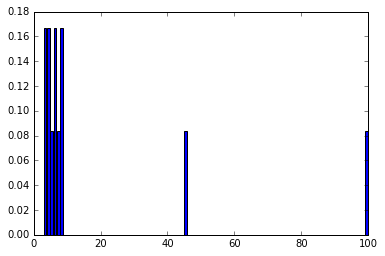

In [18]:
RemaningLifetime()

Exercise 2.5 In Section 2.1 we computed the mean of a sample by adding
up the elements and dividing by n. If you are given a PMF, you can still
compute the mean, but the process is slightly different:
m =åi
pixi
where the xi are the unique values in the PMF and pi=PMF(xi). Similarly,
you can compute variance like this:
s2 =åi
pi(xi 􀀀 m)2
Write functions called PmfMean and PmfVar that take a Pmf object and compute
the mean and variance. To test these methods, check that they are
consistent with the methods Mean and Var in Pmf.py.

In [23]:
def PmfMean():
    initial_pmf_from_list = Pmf.MakePmfFromList([int(i) for i in raw_input("Please enter list: ").split(',')])

    mean_list = []
    # iterate though the pmf dictionary
    for key, val in initial_pmf_from_list.GetDict().iteritems():
        mean_list.append(key*val)

    pmf_mean = sum(mean_list)
    
    print "The mean of the PMF is: ", pmf_mean
    print "The Pmf module gives a mean of: ", initial_pmf_from_list.Mean()
    
    return initial_pmf_from_list, pmf_mean 
    

In [24]:
def PmfVar(initial_pmf_from_list ,pmf_mean):
    
    i = 0
    variance_list = []
    for key, val in initial_pmf_from_list.GetDict().iteritems():
        
        variance_list.append(val*(key-pmf_mean)**2)
        
    pmf_var = sum(variance_list)
    
    print "The variance of the PMF is: ", pmf_var
    print "The Pmf module gives a variance of: ", initial_pmf_from_list.Var()
    
    return pmf_var
        
        

In [25]:
initial_pmf_from_list, pmf_mean = PmfMean()

Please enter list: 4,5,6,7,8,7,6,0
The mean of the PMF is:  5.375
The Pmf module gives a mean of:  5.375


In [26]:
PmfVar(initial_pmf_from_list, pmf_mean)

The variance of the PMF is:  5.484375
The Pmf module gives a variance of:  5.484375


5.484375

Exercise 2.6 
Create a file named risk.py. Write functions named
ProbEarly, ProbOnTime and ProbLate that take a PMF and compute the fraction
of births that fall into each bin. Hint: write a generalized function that
these functions call.
Make three PMFs, one for first babies, one for others, and one for all live
births. For each PMF, compute the probability of being born early, on time,
or late.
One way to summarize data like this is with relative risk, which is a ratio
of two probabilities. For example, the probability that a first baby is born
early is 18.2%. For other babies it is 16.8%, so the relative risk is 1.08. That
means that first babies are about 8% more likely to be early.
Write code to confirm that result, then compute the relative risks of being
born on time and being late.

In [48]:
# These functions use results from cells above that produce the lists of gestation times, so make sure 
# those cells have been run.

def gen_funct(type):
    
    if type == "first":
        first_born_pmf = Pmf.MakePmfFromList(first_born_gest)
        return first_born_pmf
    elif type == "other":
        other_born_pmf = Pmf.MakePmfFromList(other_born_gest)
        return other_born_pmf
    elif type == "all":
        all_born_pmf = Pmf.MakePmfFromList(first_born_gest + other_born_gest)
        return all_born_pmf
    else:
        print "you must type 'first', for first-born, 'other', for other born, or 'all' for all cases"

def ProbEarly(type):
    # if a birth occurs on or before week 37, it is an early birth
    pmf = gen_funct(type)
    probability_list = []
    for key, val in pmf.GetDict().iteritems():
        if key <= 37:
            probability_list.append(val)
    probability = sum(probability_list)
    print "The probability of %s born births occuring early is %f" % (type, probability)
    return probability

def ProbOnTime(type):
    # if a birth occurs on week 38,39 or 40, it is an on time birth
    pmf = gen_funct(type)
    probability_list = []
    for key, val in pmf.GetDict().iteritems():
        if key in [38,39,40]:
            probability_list.append(val)
    probability = sum(probability_list)
    #print "The probability of %s born births occuring on time is %f" % (type, probability)
    return probability
    

def ProbLate(type):
    # if a birth occurs on or after week 41, it is a late birth
    pmf = gen_funct(type)
    probability_list = []
    for key, val in pmf.GetDict().iteritems():
        if key >= 41:
            probability_list.append(val)
    probability = sum(probability_list)
    #print "The probability of %s born births occuring late is %f" % (type, probability)
    return probability

def RelativeRisk():
    print "The relative risk of being born on time is", ProbOnTime("first")/ProbOnTime("other")
    print "The relative risk of being born late is", ProbLate("first")/ProbLate("other")

In [50]:
ProbEarly("other")
RelativeRisk()

The probability of other born births occuring early is 0.168321
The relative risk of being born on time is 0.897311775027
The relative risk of being born late is 1.65778116662
